Tópico	24 – Aplicar a Transformada de Hough em imagens tons de cinza para detecção de linhas e circulos. Tópico da aula 9

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [2]:
def DetectarCirculos(img, cimg): 
    # busca por círculos pela transformada de Hough
    circles = cv2.HoughCircles(img,cv2.HOUGH_GRADIENT,1,20,
                                param1 = 50,param2 = 30, minRadius = 30,maxRadius = 60)
 
    circles = np.uint16(np.around(circles))
 
    
    for i in circles[0,:]:
        # Desenha o círculo
        cv2.circle(cimg,(i[0],i[1]),i[2],(0, 255, 0),2)
        # Desenha o centro do círculo
        cv2.circle(cimg,(i[0],i[1]),2,(255, 0, 0),3)
        
 
    plt.rcParams['figure.figsize'] = (16,16)
    plt.subplot(1, 2, 1)
    plt.imshow(img, 'gray')
    plt.title("Imagem original")
    
    plt.subplot(1, 2, 2)
    plt.imshow(cimg, 'gray')
    plt.title("Detecção de círculos")
    plt.show()

In [3]:
def DetectarRetas(img, gray):
    plt.subplot(1, 3, 1)
    plt.imshow(img, 'gray')
    plt.title("Original")

    edges = cv2.Canny(gray, 1, 50, apertureSize = 3)    
    
    plt.subplot(1, 3, 2)
    plt.imshow(edges, 'gray')
    plt.title("Bordas")

    lines = cv2.HoughLines(edges, 1, np.pi/180, 200)
    
    for line in lines:
        rho, theta = line[0]
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a * rho
        y0 = b * rho
        x1 = int(x0 + 1000 * (-b))
        y1 = int(y0 + 1000 * (a))
        x2 = int(x0 - 1000 * (-b))
        y2 = int(y0 - 1000 * (a))

        cv2.line(img,(x1, y1),(x2, y2),(0, 255, 0), 2)

   
    plt.subplot(1, 3, 3)
    plt.imshow(img, 'gray')
    plt.title("Detecção de linhas")
    plt.show()

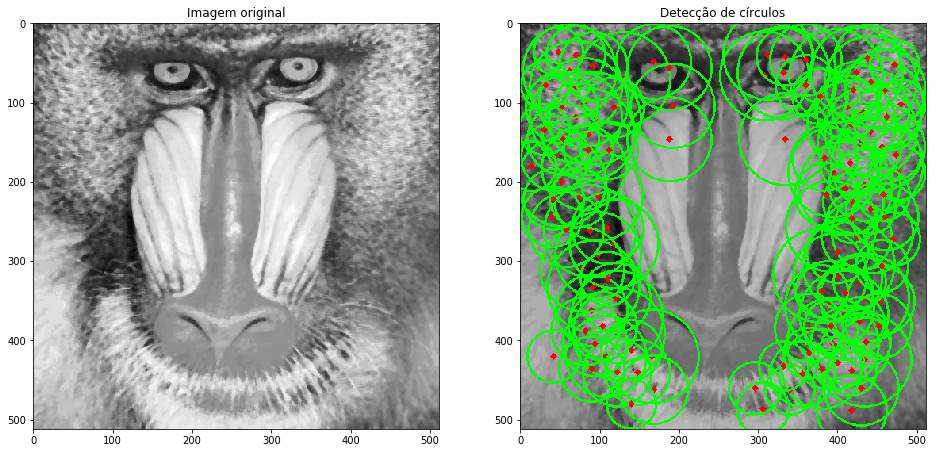

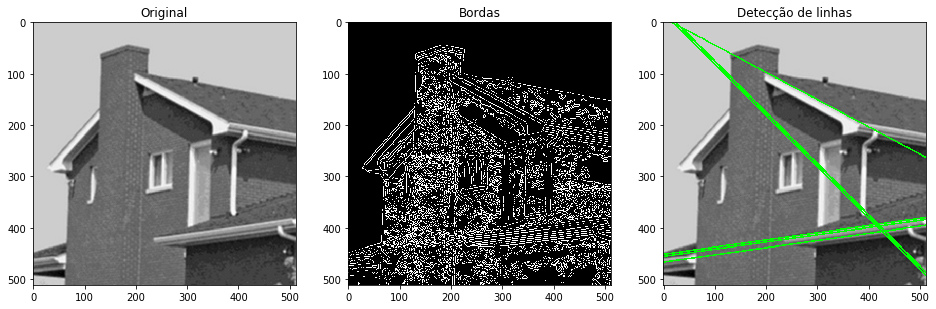

In [4]:
if __name__ == '__main__':
    img = cv2.imread('imagens/mandril_color.tif',0)
    # filtro da mediana
    img = cv2.medianBlur(img, 5)
    
    #conversão para escala cinza
    cimg = cv2.cvtColor(img,cv2.COLOR_GRAY2BGR)
    DetectarCirculos(img, cimg)
    
    img = cv2.imread('imagens/house.tif')        
    
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    
    DetectarRetas(img, gray)
    